# Carregar dados

In [1]:
import pandas as pd

# # Mostrar mais colunas
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 100)

df = pd.read_parquet(
    "./output/silver/rais_TODOS_ANOS_TODAS_COLS_RAIS_VINC_PUB.parquet.gzip")


qnt_full = len(df)
print(f"""
Quantidade docs: {qnt_full}
""")

df.head(2)



Quantidade docs: 1543009



,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,desligamento_id,ocupacao_id,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,id_uf_municipio,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),remuneracao_media,Vl Remun Média (SM),CNAE 2.0 Subclasse,sexo_id,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial,ano,sigla_uf,sigla_municipio,Vl Rem Janeiro SC,Vl Rem Fevereiro SC,Vl Rem Março SC,Vl Rem Abril SC,Vl Rem Maio SC,Vl Rem Junho SC,Vl Rem Julho SC,Vl Rem Agosto SC,Vl Rem Setembro SC,Vl Rem Outubro SC,Vl Rem Novembro SC,Tipo Salário,Vl Salário Contratual
0,{ñ class},{ñ class},{ñ class},99,99,99,12,317210,47512,52450,{ñ class},0,2,6,0,1,1,6,44,17,0,1,8,10,0,500240,10,2135,0,0,2,0,0.0,0.0,997.99,0.99,4751201,1,1,2.9,1,1,CNPJ,0,10,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.98,9.98,0.0,0.0,0,0,0,2019,MS,Caarapo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,{ñ class},{ñ class},{ñ class},80,99,99,11,212420,10112,15113,{ñ class},0,5,6,0,99,8,6,44,36,0,0,0,1,500570,500570,10,2046,0,1,2,0,0.0,0.0,0.00,0.00,1011201,1,10,170.2,0,1,CNPJ,0,10,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0,0,0,2019,MS,Navirai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


C:\Users\marce\AppData\Local\Temp\ipykernel_13072\3679701469.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=1, annot=True, linewidths=.5)


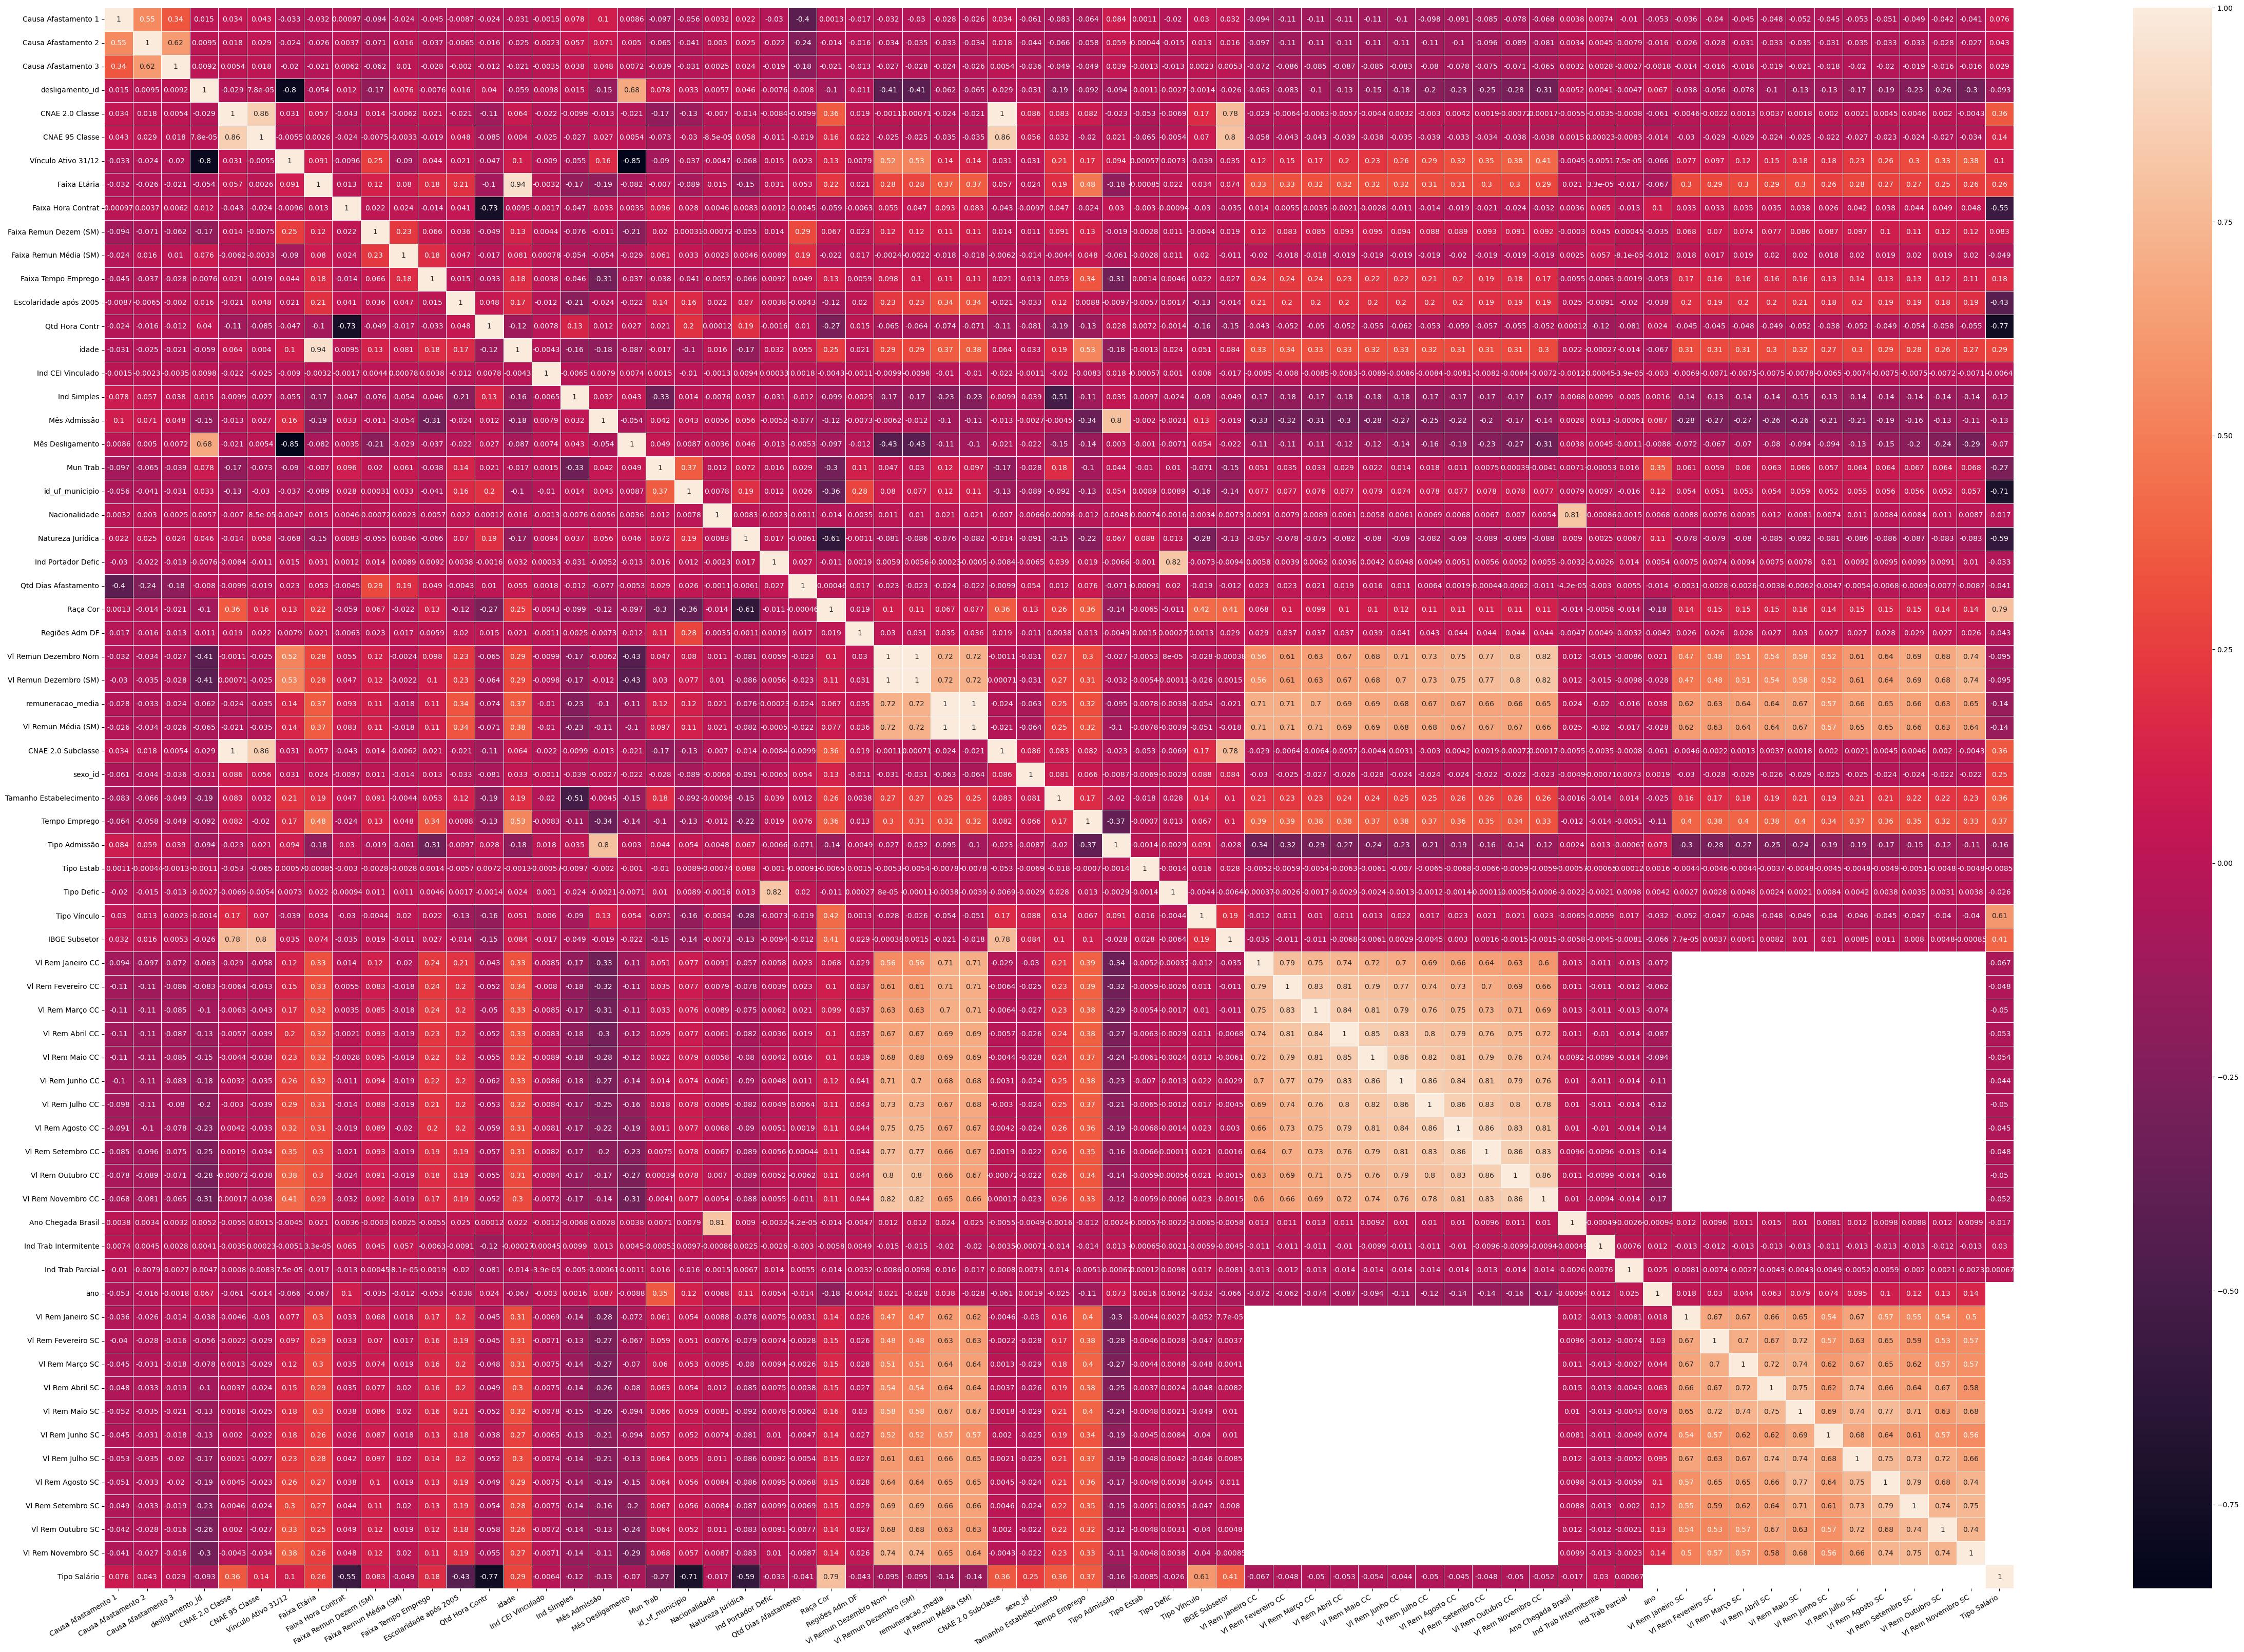

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 40))
sns.heatmap(df.corr(), vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment="right")
plt.show()


In [4]:
df["Tipo Salário"].value_counts()

1.0    414723
6.0     48869
5.0      3080
7.0        62
2.0        57
4.0        39
3.0        22
Name: Tipo Salário, dtype: int64

In [9]:
df[["sexo_id", "Tipo Salário"]].describe()

,sexo_id,Tipo Salário
count,1.543009e+06,466852.000000
mean,1.206990e+00,1.551042
std,4.051482e-01,1.557146
min,1.000000e+00,1.000000
25%,1.000000e+00,1.000000
50%,1.000000e+00,1.000000
75%,1.000000e+00,1.000000
max,2.000000e+00,7.000000


In [6]:
# df.to_csv("./temp-ana-full.csv")


In [7]:
df[df["remuneracao_media"] > 0]

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,desligamento_id,ocupacao_id,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,id_uf_municipio,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),remuneracao_media,Vl Remun Média (SM),CNAE 2.0 Subclasse,sexo_id,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial,ano,sigla_uf,sigla_municipio,Vl Rem Janeiro SC,Vl Rem Fevereiro SC,Vl Rem Março SC,Vl Rem Abril SC,Vl Rem Maio SC,Vl Rem Junho SC,Vl Rem Julho SC,Vl Rem Agosto SC,Vl Rem Setembro SC,Vl Rem Outubro SC,Vl Rem Novembro SC,Tipo Salário,Vl Salário Contratual
0,{ñ class},{ñ class},{ñ class},99,99,99,12,317210,47512,52450,{ñ class},0,2,6,0,1,1,6,44,17,0,1,8,10,0,500240,10,2135,0,0,2,0,0.00,0.00,997.99,0.99,4751201,1,1,2.9,1,1,CNPJ,0,10,16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,9.98,0.00,0.00,0,0,0,2019,MS,Caarapo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,{ñ class},{ñ class},{ñ class},99,99,99,21,317110,86101,85111,{ñ class},0,3,6,0,3,6,6,44,21,0,0,0,12,500270,500270,10,3999,0,0,2,0,1294.95,1.29,1547.16,1.54,8610101,1,9,42.0,0,1,CNPJ,0,10,22,1576.65,1453.21,1231.63,1731.11,15.89,2010.82,1443.25,1435.65,1405.80,1943.32,1450.55,0,0,0,2019,MS,Campo Grande,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,{ñ class},{ñ class},{ñ class},80,99,99,11,317205,62031,72214,{ñ class},0,5,5,0,2,7,6,36,32,0,0,0,5,500270,500270,10,2062,0,30,8,0,0.00,0.00,1456.14,1.45,6203100,1,9,65.0,0,1,CNPJ,0,10,19,1858.07,1337.85,1227.14,1401.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,2019,MS,Campo Grande,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,{ñ class},{ñ class},{ñ class},99,99,99,11,317205,62031,72214,{ñ class},0,3,5,0,2,7,6,36,24,0,0,0,5,500270,500270,10,2062,0,0,2,0,0.00,0.00,1314.90,1.31,6203100,1,9,61.7,0,1,CNPJ,0,10,19,1292.77,1265.66,1247.97,1453.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,2019,MS,Campo Grande,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
5,{ñ class},{ñ class},{ñ class},99,99,99,11,317210,47512,52450,{ñ class},0,3,6,0,3,5,6,44,24,0,1,0,6,0,500295,10,2062,0,0,2,0,0.00,0.00,1689.91,1.68,4751201,1,2,31.8,0,1,CNPJ,0,10,16,1281.99,1765.50,1654.15,17.80,1653.40,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,2019,MS,Chapadao do Sul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543004,{ñ class},{ñ class},{ñ class},99,99,99,0,212405,85325,80322,{ñ class},1,6,6,9,8,2,11,44,47,0,0,8,-1,0,431490,10,3999,0,0,2,0,10485.00,9.53,10415.10,9.46,8532500,2,10,4.9,2,1,CNPJ,0,10,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2021,RS,Porto Alegre,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10135.50,104.85,104.85,104.85,NaN,None
1543005,{ñ class},{ñ class},{ñ class},50,99,99,0,212405,72100,73105,{ñ class},1,5,5,10,8,5,11,40,38,0,0,0,-1,431490,431490,10,3999,0,114,9,0,11388.30,10.35,9932.69,9.02,7210000,2,7,32.9,0,1,CNPJ,0,10,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2021,RS,Porto Alegre,8591.14,17539.73,9164.90,8591.14,8591.14,8591.14,8591.14,8591.14,9500.01,95.00,10552.60,NaN,None
1543006,{ñ class},{ñ class},{ñ class},99,99,99,0,317210,82199,74

In [8]:
df_sexo = pd.read_csv("./output/bronze/planilhas/dic_sexo.csv")
df_ordered_sinonimo = pd.read_csv("./output/bronze/planilhas/ordered_sinonimo.csv")

In [9]:
# change column ocupacao_id to int
df["ocupacao_id"] = df["ocupacao_id"].astype(int)

# Juntando tabelas

In [10]:

df = pd.merge(df, df_sexo, left_on="sexo_id", right_on="chave",
              how="left")
df = pd.merge(df, df_ordered_sinonimo, left_on="ocupacao_id",
              right_on="cbo_2002", how="left")
df.head(2)

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,desligamento_id,ocupacao_id,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,id_uf_municipio,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),remuneracao_media,Vl Remun Média (SM),CNAE 2.0 Subclasse,sexo_id,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial,ano,sigla_uf,sigla_municipio,Vl Rem Janeiro SC,Vl Rem Fevereiro SC,Vl Rem Março SC,Vl Rem Abril SC,Vl Rem Maio SC,Vl Rem Junho SC,Vl Rem Julho SC,Vl Rem Agosto SC,Vl Rem Setembro SC,Vl Rem Outubro SC,Vl Rem Novembro SC,Tipo Salário,Vl Salário Contratual,chave,valor,cbo_2002,sinonimo
0,{ñ class},{ñ class},{ñ class},99,99,99,12,317210,47512,52450,{ñ class},0,2,6,0,1,1,6,44,17,0,1,8,10,0,500240,10,2135,0,0,2,0,0.0,0.0,997.99,0.99,4751201,1,1,2.9,1,1,CNPJ,0,10,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.98,9.98,0.0,0.0,0,0,0,2019,MS,Caarapo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1,Masculino,317210,Tecnico de Apoio ao Usuario de Informatica (Helpdesk)
1,{ñ class},{ñ class},{ñ class},80,99,99,11,212420,10112,15113,{ñ class},0,5,6,0,99,8,6,44,36,0,0,0,1,500570,500570,10,2046,0,1,2,0,0.0,0.0,0.00,0.00,1011201,1,10,170.2,0,1,CNPJ,0,10,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0,0,0,2019,MS,Navirai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1,Masculino,212420,Analista de Suporte Computacional


### Alterando remuneração média de NaN para 0

In [11]:
df["remuneracao_media"].fillna(0, inplace=True)


# Gerando ID para ANO

In [12]:
# # Create id for sigla_uf
# df["ano_id"] = df["ano"].astype("category").cat.codes
# df.head(2)


# Gerando ID para Sigla_UF

In [13]:
# Create id for sigla_uf
df["sigla_uf_id"] = df["sigla_uf"].astype("category").cat.codes
df.head(2)


,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,desligamento_id,ocupacao_id,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,id_uf_municipio,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),remuneracao_media,Vl Remun Média (SM),CNAE 2.0 Subclasse,sexo_id,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial,ano,sigla_uf,sigla_municipio,Vl Rem Janeiro SC,Vl Rem Fevereiro SC,Vl Rem Março SC,Vl Rem Abril SC,Vl Rem Maio SC,Vl Rem Junho SC,Vl Rem Julho SC,Vl Rem Agosto SC,Vl Rem Setembro SC,Vl Rem Outubro SC,Vl Rem Novembro SC,Tipo Salário,Vl Salário Contratual,chave,valor,cbo_2002,sinonimo,sigla_uf_id
0,{ñ class},{ñ class},{ñ class},99,99,99,12,317210,47512,52450,{ñ class},0,2,6,0,1,1,6,44,17,0,1,8,10,0,500240,10,2135,0,0,2,0,0.0,0.0,997.99,0.99,4751201,1,1,2.9,1,1,CNPJ,0,10,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.98,9.98,0.0,0.0,0,0,0,2019,MS,Caarapo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1,Masculino,317210,Tecnico de Apoio ao Usuario de Informatica (Helpdesk),11
1,{ñ class},{ñ class},{ñ class},80,99,99,11,212420,10112,15113,{ñ class},0,5,6,0,99,8,6,44,36,0,0,0,1,500570,500570,10,2046,0,1,2,0,0.0,0.0,0.00,0.00,1011201,1,10,170.2,0,1,CNPJ,0,10,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0,0,0,2019,MS,Navirai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1,Masculino,212420,Analista de Suporte Computacional,11


## Gerando Regiões por Sigla

In [14]:
# SEPARATE sigla_uf by regions

# https://pt.wikipedia.org/wiki/Regi%C3%B5es_do_Brasil
# https://pt.wikipedia.org/wiki/Unidades_federativas_do_Brasil
REGIOES = {
    "Norte": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Centro-Oeste": ["GO", "MT", "MS", "DF"],
    "Sudeste": ["ES", "MG", "RJ", "SP"],
    "Sul": ["PR", "RS", "SC"]
}


In [15]:
df_regiao = df.copy()

# add col Regioes to df_ana with REGIOES
for regiao, siglas in REGIOES.items():
    df_regiao.loc[df["sigla_uf"].isin(
        siglas), "regiao"] = regiao

df_regiao["regiao_id"] = df_regiao["regiao"].astype("category").cat.codes
df = df_regiao
df.head(2)


,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,desligamento_id,ocupacao_id,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,id_uf_municipio,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),remuneracao_media,Vl Remun Média (SM),CNAE 2.0 Subclasse,sexo_id,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial,ano,sigla_uf,sigla_municipio,Vl Rem Janeiro SC,Vl Rem Fevereiro SC,Vl Rem Março SC,Vl Rem Abril SC,Vl Rem Maio SC,Vl Rem Junho SC,Vl Rem Julho SC,Vl Rem Agosto SC,Vl Rem Setembro SC,Vl Rem Outubro SC,Vl Rem Novembro SC,Tipo Salário,Vl Salário Contratual,chave,valor,cbo_2002,sinonimo,sigla_uf_id,regiao,regiao_id
0,{ñ class},{ñ class},{ñ class},99,99,99,12,317210,47512,52450,{ñ class},0,2,6,0,1,1,6,44,17,0,1,8,10,0,500240,10,2135,0,0,2,0,0.0,0.0,997.99,0.99,4751201,1,1,2.9,1,1,CNPJ,0,10,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.98,9.98,0.0,0.0,0,0,0,2019,MS,Caarapo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1,Masculino,317210,Tecnico de Apoio ao Usuario de Informatica (Helpdesk),11,Centro-Oeste,0
1,{ñ class},{ñ class},{ñ class},80,99,99,11,212420,10112,15113,{ñ class},0,5,6,0,99,8,6,44,36,0,0,0,1,500570,500570,10,2046,0,1,2,0,0.0,0.0,0.00,0.00,1011201,1,10,170.2,0,1,CNPJ,0,10,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0,0,0,2019,MS,Navirai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1,Masculino,212420,Analista de Suporte Computacional,11,Centro-Oeste,0


# Desligamento

In [16]:
# Create new col desligamento from desligament_id, if != 0, so "nao", otherwise "sim"
df["desligamento"] = df["desligamento_id"].apply(
    lambda x: 0 if x != 0 else 1)
df.head(2)



,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,desligamento_id,ocupacao_id,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,id_uf_municipio,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),remuneracao_media,Vl Remun Média (SM),CNAE 2.0 Subclasse,sexo_id,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial,ano,sigla_uf,sigla_municipio,Vl Rem Janeiro SC,Vl Rem Fevereiro SC,Vl Rem Março SC,Vl Rem Abril SC,Vl Rem Maio SC,Vl Rem Junho SC,Vl Rem Julho SC,Vl Rem Agosto SC,Vl Rem Setembro SC,Vl Rem Outubro SC,Vl Rem Novembro SC,Tipo Salário,Vl Salário Contratual,chave,valor,cbo_2002,sinonimo,sigla_uf_id,regiao,regiao_id,desligamento
0,{ñ class},{ñ class},{ñ class},99,99,99,12,317210,47512,52450,{ñ class},0,2,6,0,1,1,6,44,17,0,1,8,10,0,500240,10,2135,0,0,2,0,0.0,0.0,997.99,0.99,4751201,1,1,2.9,1,1,CNPJ,0,10,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.98,9.98,0.0,0.0,0,0,0,2019,MS,Caarapo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1,Masculino,317210,Tecnico de Apoio ao Usuario de Informatica (Helpdesk),11,Centro-Oeste,0,0
1,{ñ class},{ñ class},{ñ class},80,99,99,11,212420,10112,15113,{ñ class},0,5,6,0,99,8,6,44,36,0,0,0,1,500570,500570,10,2046,0,1,2,0,0.0,0.0,0.00,0.00,1011201,1,10,170.2,0,1,CNPJ,0,10,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0,0,0,2019,MS,Navirai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1,Masculino,212420,Analista de Suporte Computacional,11,Centro-Oeste,0,0


# Selecionando colunas necessárias

In [17]:
df = df[["ano", "sigla_uf_id", "regiao", "regiao_id", "sigla_uf", "remuneracao_media", 'desligamento', "idade",
         "ocupacao_id", "sinonimo", "sexo_id", "valor", "sigla_municipio"]]

df = df.rename(columns={
    "sinonimo": "ocupacao",
    "valor": "sexo"
    })

df.head(2)

,ano,sigla_uf_id,regiao,regiao_id,sigla_uf,remuneracao_media,desligamento,idade,ocupacao_id,ocupacao,sexo_id,sexo,sigla_municipio
0,2019,11,Centro-Oeste,0,MS,997.99,0,17,317210,Tecnico de Apoio ao Usuario de Informatica (Helpdesk),1,Masculino,Caarapo
1,2019,11,Centro-Oeste,0,MS,0.00,0,36,212420,Analista de Suporte Computacional,1,Masculino,Navirai


# Verificando se tem mais algum valor Nulo

In [18]:

df[df.isna().any(axis=1)]


,ano,sigla_uf_id,regiao,regiao_id,sigla_uf,remuneracao_media,desligamento,idade,ocupacao_id,ocupacao,sexo_id,sexo,sigla_municipio


# Colocando a idade com o mínimo

In [19]:
df.loc[df["idade"] == 0, "idade"] = 14
df["idade"].describe()


count    1.543009e+06
mean     3.396295e+01
std      9.633748e+00
min      1.400000e+01
25%      2.700000e+01
50%      3.200000e+01
75%      3.900000e+01
max      9.200000e+01
Name: idade, dtype: float64

# Salvando arquivo

In [20]:
df.to_parquet("./output/gold/rais_TODOS_ANOS_comJoin_RAIS_VINC_PUB.parquet.gzip", index=False, compression="gzip")